## **Northeastern SMILE Lab - Recognizing Faces in the Wild**

## Background

The SMILE Lab at Northeastern focuses on the frontier research of applied machine learning, social media analytics, human-computer interaction, and high-level image and video understanding. Their research is driven by the explosion of diverse multimedia from the Internet, including both personal and publicly available photos and videos. They start by treating fundamental theory from learning algorithms as the soul of machine intelligence and arm it with visual perception.

Northeastern University has been developing an automatic kinship classifier since 2010. However, the widespread adoption of this technology has been hindered by two primary factors:

- Data Limitations: Existing image databases for kinship recognition are insufficient in size and diversity to accurately represent global familial relationships.

- Model Complexity: The complex interplay of genetic and environmental factors influencing facial features necessitates a more advanced model than traditional computer vision algorithms, which are typically designed for higher-level tasks like facial recognition or object classification.

## Objective

Using the provided competition data, the following model predicts the probability of two individuals being related (1) based solely on a pair of facial images. 

## **Preliminaries**: Install the following Python modules.

In [1]:
# If they are not already installed, this cell installs the modules used in this solution.
%pip install collections
%pip install glob
%pip install kaggle
%pip install os
%pip install pandas
%pip install matplotlib
%pip install sklearn
%pip install zipfile

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement collections (from versions: none)
ERROR: No matching distribution found for collections


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement glob (from versions: none)
ERROR: No matching distribution found for glob


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
^C
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement zipfile (from versions: none)
ERROR: No matching distribution found for zipfile


## **Step 1**: Download the official Kaggle competition data (a.k.a. FIW data).

***Before executing the following cell***, please review section 7 of the rules: https://www.kaggle.com/competitions/recognizing-faces-in-the-wild/rules#7-competition-data. 

All usages of FIW data should cite the following papers:

*Joseph P Robinson, Ming Shao, Hongfu Liu, Yue Wu, Timothy Gillis, and Yun Fu. "Visual Kinship Recognition of Families In the Wild" IEEE TPAMI Special Edition: Computational Face (2018).
Joseph P Robinson, Ming Shao, Handong Zhao, Yue Wu, Timothy Gillis, Yun Fu. "Recognizing Families In the Wild (RFIW): Data Challenge Workshop in conjunction with ACM MM 2017," ACM Multimedia Conference: Workshop on RFIW (2017).
Shuyang Wang, Joseph P Robinson, and Yun Fu. “Kinship Verification on Families in the Wild with Marginalized Denoising Metric Learning,” in IEEE Automatic Face and Gesture Recognition (2017).
Joseph P Robinson, Ming Shao, Yue Wu, and Yun Fu. “Families In the Wild (FIW): large-scale kinship image database and benchmarks." in ACM on Multimedia Conference (2016).*

In [1]:
download_path = '_provided-data' # Intermediate directories are excluded recursively via. .gitignore (i.e., '_*/').
competition = 'recognizing-faces-in-the-wild' # Hosted here: https://www.kaggle.com/c/recognizing-faces-in-the-wild

In [ ]:
import os
from kaggle.api.kaggle_api_extended import KaggleApi

os.makedirs(download_path, exist_ok=True)
print('Downloading ' + competition + ' provided data into ' + download_path)
api = KaggleApi()
api.authenticate()
api.competition_download_files(competition, path = download_path)

In [2]:
import os
import zipfile

def unzip(zip_path):
    dest_dir = '_' + os.path.basename(zip_path)[:-4]
    if (not os.path.exists(dest_dir)):
        os.makedirs(dest_dir, exist_ok=True)
        print('Decompressing ' + zip_path + ' into ' + dest_dir)
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(dest_dir)
    print(dest_dir + '/')
    print(os.listdir(dest_dir))
    return dest_dir

print('Decompressing ' + competition + ' provided data:')
dataset_path = unzip(download_path + '/' + competition + '.zip')
training_image_path = unzip(dataset_path + '/train-faces.zip')
testing_image_path = unzip(dataset_path + '/test-faces.zip')

Decompressing recognizing-faces-in-the-wild provided data:
_recognizing-faces-in-the-wild/
['README.md', 'sample_submission.csv', 'test-faces.zip', 'test-private-faces.zip', 'test-private-labels.zip', 'test-private-lists.zip', 'test-public-faces.zip', 'test-public-lists.zip', 'test.zip', 'train-faces.zip', 'train.zip', 'train_relationships.csv']
_train-faces/
['F0001', 'F0002', 'F0003', 'F0004', 'F0005', 'F0006', 'F0007', 'F0008', 'F0011', 'F0012', 'F0015', 'F0016', 'F0017', 'F0018', 'F0020', 'F0021', 'F0022', 'F0023', 'F0024', 'F0026', 'F0027', 'F0028', 'F0029', 'F0030', 'F0031', 'F0032', 'F0033', 'F0034', 'F0035', 'F0036', 'F0038', 'F0039', 'F0040', 'F0041', 'F0042', 'F0043', 'F0044', 'F0045', 'F0046', 'F0047', 'F0048', 'F0050', 'F0052', 'F0053', 'F0054', 'F0055', 'F0056', 'F0057', 'F0060', 'F0061', 'F0062', 'F0063', 'F0064', 'F0065', 'F0066', 'F0067', 'F0068', 'F0069', 'F0070', 'F0071', 'F0072', 'F0074', 'F0075', 'F0077', 'F0078', 'F0079', 'F0080', 'F0081', 'F0082', 'F0083', 'F0086'

## **Step ?**: Preprocess the image portion of the provided dataset.

In [3]:
from collections import defaultdict
import glob

# Create a dictionary to lookup image files for each member
family_dict = defaultdict(list)
for family in glob.glob(training_image_path + '*'):
    for member in glob.glob(family + '/*'):
        for image_path in glob.glob(member + '/*'):
            member = member.split('\\')[-1]
            image_path = image_path.split('\\')[-1]
            family_dict[member].append(image_path)

print('Here are the first few of the ' + str(len(family_dict.items())) + ' total families:')
for key, value in list(family_dict.items())[:5]:
    print(str(key) + ': ' + str(value) + ',')

Here are the first few of the 786 total families:
F0001: ['MID1', 'MID2', 'MID3', 'MID4'],
F0002: ['MID1', 'MID2', 'MID3'],
F0003: ['MID1', 'MID2', 'MID3', 'MID4'],
F0004: ['MID1', 'MID2', 'MID3', 'MID4', 'MID5', 'MID6', 'MID7'],
F0005: ['MID1', 'MID2', 'MID3'],


## **Step 4**: Preprocess (clean) the relational portion of the provided dataset.

The _train_relationships.csv_ encodes (ground truth) kinship relations between pairs of people. 

In [4]:
import pandas
relations_csv_path = dataset_path + '/train_relationships.csv'
print('Loading ' + relations_csv_path)
relations_df = pandas.read_csv(relations_csv_path, delimiter=',', header='infer')
relations_df.head()

Loading _recognizing-faces-in-the-wild/train_relationships.csv


,p1,p2
0,F0002/MID1,F0002/MID3
1,F0002/MID2,F0002/MID3
2,F0005/MID1,F0005/MID2
3,F0005/MID3,F0005/MID2
4,F0009/MID1,F0009/MID4


## **Step ?**: Remove invalid encodings
To improve the training efficiency, the relations dataframe is groomed to be fully valid (each referenced family member has at least one images in train-faces\...).

In [5]:
import pandas
relations_csv_path = dataset_path + '/train_relationships.csv'
print('Loading ' + relations_csv_path)
relations_df = pandas.read_csv(relations_csv_path, delimiter=',', header='infer')

# Remove entries which do not exist in the training set
print('The original ground truth relations data contains ' + str(len(relations_df)) + ' entries.')
print(relations_df)

print('Checking for relation image data.')
fam_keys = family_dict.keys()
missing_relations_list = []
for index, row in relations_df.iterrows():
    split1 = row.p1.split('/')
    split2 = row.p2.split('/')
    p1fam = split1[0]
    p2fam = split2[0]
    if (p1fam not in fam_keys or p2fam not in fam_keys):
        missing_relations_list.append(index)
        continue
    p1member = split1[1]
    p2member = split2[1]
    if (p1member not in family_dict[p1fam] or p2member not in family_dict[p2fam]):
        missing_relations_list.append(index)
        continue
    images1 = os.listdir(training_image_path + '/' + p1fam + '/' + p1member)
    images2 = os.listdir(training_image_path + '/' + p2fam + '/' + p2member)
    if (len(images1) == 0 or len(images2) == 0):
        missing_relations_list.append(index)
        continue
if (missing_relations_list.count):
    relations_df = relations_df.drop(missing_relations_list)
    print(str(len(missing_relations_list)) + ' entries were removed due to missing data.')
print(relations_df)


Loading _recognizing-faces-in-the-wild/train_relationships.csv
The original ground truth relations data contains 3598 entries.
              p1          p2
0     F0002/MID1  F0002/MID3
1     F0002/MID2  F0002/MID3
2     F0005/MID1  F0005/MID2
3     F0005/MID3  F0005/MID2
4     F0009/MID1  F0009/MID4
...          ...         ...
3593  F1000/MID5  F1000/MID8
3594  F1000/MID5  F1000/MID9
3595  F1000/MID6  F1000/MID9
3596  F1000/MID7  F1000/MID8
3597  F1000/MID7  F1000/MID9

[3598 rows x 2 columns]
Checking for relation image data.
1108 entries were removed due to missing data.
              p1          p2
0     F0002/MID1  F0002/MID3
1     F0002/MID2  F0002/MID3
2     F0005/MID1  F0005/MID2
3     F0005/MID3  F0005/MID2
29    F0016/MID1  F0016/MID5
...          ...         ...
3571  F0998/MID5  F0998/MID3
3572  F0998/MID5  F0998/MID1
3573  F0998/MID6  F0998/MID1
3574  F0998/MID6  F0998/MID2
3575  F0998/MID6  F0998/MID3

[2490 rows x 2 columns]


## **Step ?**: Create a lookup function to return if members are related.

In [45]:
# This utility function to check if two members are related, regardless of the provided order.
def isRelated(df, p1, p2):
    return (df[(df['p1'] == p1) & (df['p2'] == p2)].shape[0] > 0) \
        or (df[(df['p1'] == p2) & (df['p2'] == p1)].shape[0] > 0)

# Show a couple of true negatives and true positives
print(isRelated(relations_df, 'bad', 'data'))              # False
print(isRelated(relations_df, 'F0002/MID2', 'F0005/MID2')) # False
print(isRelated(relations_df, 'F0998/MID6', 'F0998/MID3')) # True
print(isRelated(relations_df, 'F0998/MID3', 'F0998/MID6')) # True


False
False
True
True


## **Step ?**: Build a list of ground truth members and images

In [7]:
# Create a list of all of the members in the relations data
members = []
for member in relations_df.values:
    if (member[0] not in members):
        members.append(member[0])
    if (member[0] not in members):
        members.append(member[0])
members.sort()
print(str(len(members)) + ' total members in the training set:')
print(members)

# Create a list of the corresponding images
image_set = []
for member in members:
    set = os.listdir(training_image_path + '/' + member)
    if (len(set) > 0):
        for image in set:
            image_set.append(member + '/' + image)
print(str(len(image_set)) + ' total images in the training set:')
print(image_set)

1234 total members in the training set:
['F0002/MID1', 'F0002/MID2', 'F0005/MID1', 'F0005/MID3', 'F0016/MID1', 'F0016/MID2', 'F0016/MID3', 'F0017/MID1', 'F0017/MID2', 'F0017/MID3', 'F0017/MID4', 'F0017/MID5', 'F0020/MID1', 'F0020/MID11', 'F0020/MID2', 'F0020/MID3', 'F0020/MID5', 'F0020/MID6', 'F0020/MID7', 'F0020/MID8', 'F0020/MID9', 'F0022/MID1', 'F0022/MID2', 'F0022/MID4', 'F0022/MID5', 'F0023/MID1', 'F0023/MID2', 'F0023/MID3', 'F0023/MID4', 'F0024/MID2', 'F0024/MID3', 'F0024/MID4', 'F0030/MID1', 'F0030/MID2', 'F0031/MID1', 'F0031/MID2', 'F0031/MID3', 'F0031/MID4', 'F0036/MID1', 'F0036/MID2', 'F0036/MID3', 'F0036/MID6', 'F0036/MID7', 'F0038/MID1', 'F0038/MID2', 'F0038/MID3', 'F0038/MID5', 'F0039/MID1', 'F0040/MID1', 'F0041/MID1', 'F0044/MID1', 'F0050/MID1', 'F0050/MID2', 'F0052/MID1', 'F0052/MID2', 'F0052/MID3', 'F0054/MID1', 'F0054/MID2', 'F0054/MID3', 'F0063/MID1', 'F0064/MID1', 'F0064/MID2', 'F0064/MID3', 'F0064/MID4', 'F0064/MID5', 'F0068/MID1', 'F0068/MID2', 'F0068/MID3', 'F0068

In [134]:
import random

# Use a a portion of the images for training (training_images)...
training_images = random.sample(image_set, int(len(image_set)-200))
print(str(len(training_images)) + ' images in training_images')
training_images.sort()
print('Showing the first three (sorted):')
print(training_images[:3])
print('Showing the first three (after shuffling):')
random.shuffle(training_images)
print(training_images[:3])

# ...and the remaining for testing (test_images).
test_images = [x for x in image_set if x not in training_images]
print(str(len(test_images)) + ' images in test_images')
print('Showing the first three (sorted):')
print(test_images[:3])
random.shuffle(test_images)
print('Showing the first three (after shuffling):')
print(test_images[:3])


7150 images in training_images
Showing the first three (sorted):
['F0002/MID1/P00009_face3.jpg', 'F0002/MID1/P00010_face4.jpg', 'F0002/MID1/P00011_face1.jpg']
Showing the first three (after shuffling):
['F0183/MID1/P01962_face1.jpg', 'F0531/MID1/P05580_face2.jpg', 'F0696/MID3/P07250_face2.jpg']
200 images in test_images
Showing the first three (sorted):
['F0002/MID2/P00010_face3.jpg', 'F0005/MID3/P00059_face1.jpg', 'F0017/MID1/P00166_face5.jpg']
Showing the first three (after shuffling):
['F0168/MID2/P01805_face1.jpg', 'F0909/MID2/P09600_face2.jpg', 'F0909/MID2/P09603_face3.jpg']


## **Step ?**: Test that at least one image exists for a random selection of the relations.

              p1          p2
2705  F0763/MID3  F0763/MID4
1076  F0299/MID2  F0299/MID3
2978  F0818/MID3  F0818/MID4


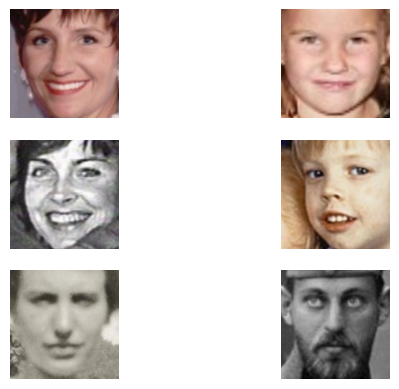

In [9]:
import cv2
import matplotlib.pyplot as plt
from random import choice

SAMPLE_COUNT = 3
samples = relations_df.sample(SAMPLE_COUNT)
print(samples)

f, ax = plt.subplots(SAMPLE_COUNT, 2)
f.patch.set_alpha(0) # Transparent background
for a in ax.flat:
    a.axis('off')
i = 0
for member in samples.values:
    img1 = training_image_path + '/' + member[0] + '/' \
        + choice(os.listdir(training_image_path + '/' + member[0]))
    img2 = training_image_path + '/' + member[1] + '/'  \
        + choice(os.listdir(training_image_path + '/' + member[1]))
    rgb1 = cv2.cvtColor(cv2.imread(img1), cv2.COLOR_BGR2RGB)
    rgb2 = cv2.cvtColor(cv2.imread(img2), cv2.COLOR_BGR2RGB)
    ax[i][0].imshow(rgb1, cmap = plt.cm.Spectral)
    ax[i][1].imshow(rgb2, cmap = plt.cm.Spectral)  
    i = i + 1

## **Step ?**: Train the model

## **Step ?**: Test the model

In [135]:
import itertools

MODEL = False
if (MODEL):
    # Create a list of all of the image pairs in the test-faces data
    test_pairs = list(itertools.combinations(os.listdir(testing_image_path), 2))
else:
    # For now, use a portion of the ground truth relations data for testing
    test_pairs = list(itertools.combinations(test_images, 2))

print('There are ' + str(len(test_pairs)) + ' total pairs in the test set.')


There are 19900 total pairs in the test set.


In [136]:
def test_image_pair(person1, person2, person1fam_index, person2fam_index):
    # TODO Once the model is trained, use it instead of this placeholder (family name) predictor
    likelihood = (person1[:person1fam_index] == person2[:person2fam_index])
    return likelihood


results = []
for pair in test_pairs[:10000]:

    person1fam_index = pair[0].find('/')
    person2fam_index = pair[1].find('/')

    person1 = pair[0][:pair[0].find('/', person1fam_index+1)]
    person2 = pair[1][:pair[1].find('/', person2fam_index+1)]
    
    results.append({'actual':int(isRelated(relations_df, person1, person2)),
                    'prediction':float(test_image_pair(person1, person2, person1fam_index, person2fam_index))})
    
results_df = pandas.DataFrame(results)
results_df.describe()

,actual,prediction
count,10000.000000,10000.000000
mean,0.005900,0.015100
std,0.076588,0.121957
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


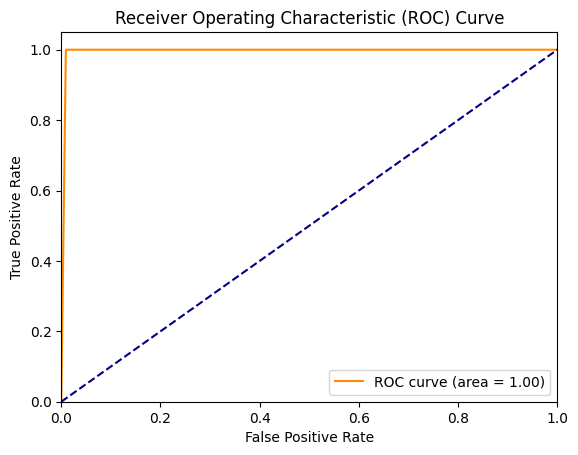

In [137]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

#import pandas
#predictions_csv_path = \
#  dataset_path + '/sample_submission.csv' # TODO replace example with actual results
#predictions_df = pandas.read_csv(predictions_csv_path, delimiter=',', header='infer')
#print(predictions_df)

# https://en.wikipedia.org/wiki/Receiver_operating_characteristic
def generate_roc_curve(data):
  true_labels = [d['actual'] for d in data]
  predicted_probs = [d['prediction'] for d in data]
  fpr, tpr, _ = roc_curve(true_labels, predicted_probs)
  roc_auc = auc(fpr, tpr)
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend(loc="lower right")
  return plt
    
generate_roc_curve(results).show()

## **Step ?**: Evaluation
Submissions are [evaluated](https://www.kaggle.com/competitions/recognizing-faces-in-the-wild/overview/evaluation) on area under the ROC curve between the predicted probability and the observed target. Not all pairs will be scored.

**Submission File**

For each img_pair in the test set, you must predict a probability for the is_related variable. The column img_pair describes the pair of images, i.e., abcdef-ghijkl means the pair of images abcdef.jpg and ghijkl.jpg.
The file should contain a header and have the following format:

```
img_pair,is_related
X3Nk6Hfe5x-qcZrTXsfde,0.0
X3Nk6Hfe5x-LD0pWDM8w_,0.0
X3Nk6Hfe5x-PHwuDtHyGp,0.0
X3Nk6Hfe5x-LO6lN_U4ot,0.0
...
```

In [138]:
import csv

submission = [['img_pair', 'is_related']]
for pair,result in zip(test_pairs, results):
    submission.append([pair[0] + '-' + pair[1], str(result['prediction'])])
filename = "submission.csv"
with open(filename, 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerows(submission)
print(f"Saved '{filename}'")

import pandas
print('Loading ' + filename)
submission_df = pandas.read_csv(filename, delimiter=',', header='infer')
submission_df.describe()

Saved 'submission.csv'
Loading submission.csv


,is_related
count,10000.000000
mean,0.015100
std,0.121957
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000
